In [214]:
#Importing Libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Importing & Pre-Processing Data

In [215]:

# Load data into a DataFrame
data = pd.read_csv('train.csv')
# Keep only the columns you want
data = data[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
         'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'SalePrice']]
data

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,65.0,8450,7,2003,856,1710,2,548,208500
1,80.0,9600,6,1976,1262,1262,2,460,181500
2,68.0,11250,7,2001,920,1786,2,608,223500
3,60.0,9550,7,1915,756,1717,3,642,140000
4,84.0,14260,8,2000,1145,2198,3,836,250000
...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,953,1647,2,460,175000
1456,85.0,13175,6,1978,1542,2073,2,500,210000
1457,66.0,9042,7,1941,1152,2340,1,252,266500
1458,68.0,9717,5,1950,1078,1078,1,240,142125


In [216]:

# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values with mean for numerical columns
for col in numerical_cols:
    if data[col].isna().sum() > 0:
        data[col].fillna(data[col].mean(), inplace=True)
data

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,65.0,8450,7,2003,856,1710,2,548,208500
1,80.0,9600,6,1976,1262,1262,2,460,181500
2,68.0,11250,7,2001,920,1786,2,608,223500
3,60.0,9550,7,1915,756,1717,3,642,140000
4,84.0,14260,8,2000,1145,2198,3,836,250000
...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,953,1647,2,460,175000
1456,85.0,13175,6,1978,1542,2073,2,500,210000
1457,66.0,9042,7,1941,1152,2340,1,252,266500
1458,68.0,9717,5,1950,1078,1078,1,240,142125


In [217]:

# Convert categorical variables to numerical variables using one-hot encoding
data = pd.get_dummies(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data using z-score normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

data

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,65.0,8450,7,2003,856,1710,2,548,208500
1,80.0,9600,6,1976,1262,1262,2,460,181500
2,68.0,11250,7,2001,920,1786,2,608,223500
3,60.0,9550,7,1915,756,1717,3,642,140000
4,84.0,14260,8,2000,1145,2198,3,836,250000
...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,953,1647,2,460,175000
1456,85.0,13175,6,1978,1542,2073,2,500,210000
1457,66.0,9042,7,1941,1152,2340,1,252,266500
1458,68.0,9717,5,1950,1078,1078,1,240,142125


# Training & Visualizing Data

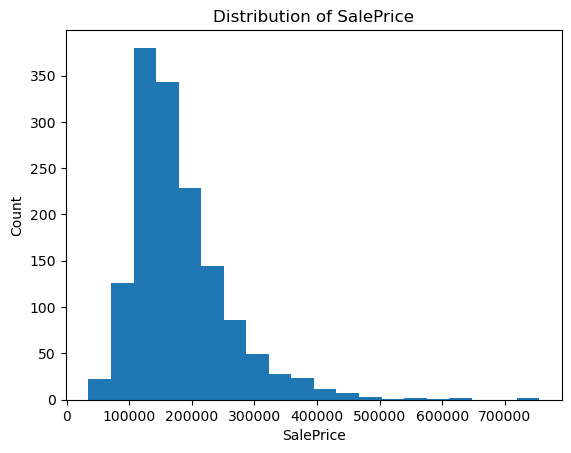

In [218]:

plt.hist(data['SalePrice'], bins=20)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()


# Model Creation & Training & Saving

In [219]:

# Create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict the prices of the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Regression Model")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


Random Forest Regression Model
MSE: 848422277.4491805
R-squared: 0.8893890227700869


In [220]:
# train and evaluate the model
model = RandomForestRegressor()
model.fit(X_train, y_train)
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))

# save the trained model to a file
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)


# Testing The Model

In [221]:
def preprocess_test_data(test_data):
    # Load data into a DataFrame
    test_data = pd.read_csv('test.csv')

    # Keep only the columns you want
    test_data = test_data[['LotFrontage', 'LotArea','OverallQual', 'YearBuilt',
         'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea']]

    # Identify numerical columns
    numerical_cols = test_data.select_dtypes(include=['int64', 'float64']).columns

    # Fill missing values with mean for numerical columns
    for col in numerical_cols:
        if test_data[col].isna().sum() > 0:
            test_data[col].fillna(test_data[col].mean(), inplace=True)

    # Convert categorical variables to numerical variables using one-hot encoding
    test_data = pd.get_dummies(test_data)
    return test_data

# Example usage
test_data = pd.read_csv('test.csv')
preprocessed_test_data = preprocess_test_data(test_data)
preprocessed_test_data

,LotFrontage,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,GarageArea
0,80.0,11622,5,1961,882.0,896,1.0,730.0
1,81.0,14267,6,1958,1329.0,1329,1.0,312.0
2,74.0,13830,5,1997,928.0,1629,2.0,482.0
3,78.0,9978,6,1998,926.0,1604,2.0,470.0
4,43.0,5005,8,1992,1280.0,1280,2.0,506.0
...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,1970,546.0,1092,0.0,0.0
1455,21.0,1894,4,1970,546.0,1092,1.0,286.0
1456,160.0,20000,5,1960,1224.0,1224,2.0,576.0
1457,62.0,10441,5,1992,912.0,970,0.0,0.0


In [222]:

def predict_sale_price(test_data):
    # Load the trained model
    model = joblib.load('trained_model.pkl')

    # Preprocess the test data
    preprocessed_test_data = preprocess_test_data(test_data)

    # Make predictions on the preprocessed test data
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_shape=(8,)))
    predicted_prices = model.predict(preprocessed_test_data.values)

    return predicted_prices


In [229]:


# Make predictions on the test data
predicted_prices = predict_sale_price(test_data)
predicted_prices_array = np.array(predicted_prices)

# Print the predicted prices
print(predicted_prices_array)


46/46 [==============================] - 0s 924us/step
[[4062.2712     0.         0.      ...    0.       644.3118     0.     ]
 [4685.8623     0.         0.      ...    0.       755.00616    0.     ]
 [4429.4175     0.         0.      ...    0.       731.9695     0.     ]
 ...
 [6503.73       0.         0.      ...    0.       407.41675    0.     ]
 [3539.1738     0.         0.      ...    0.       712.65173    0.     ]
 [3042.3718     0.         0.      ...    0.      1094.0067     0.     ]]


In [228]:
# Assuming predicted_prices is a 2D numpy array
dfss = pd.DataFrame(predicted_prices)

# Write the dataframe to a CSV file named 'predicted_prices.csv'
dfss.to_csv('predicted_prices.csv', index=False)
